# Linear Spatial Filters

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def display_images(images, titles):
    plt.figure(figsize=(20, 10))
    for i, (image, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis('off')
    plt.show()

Image loaded successfully.


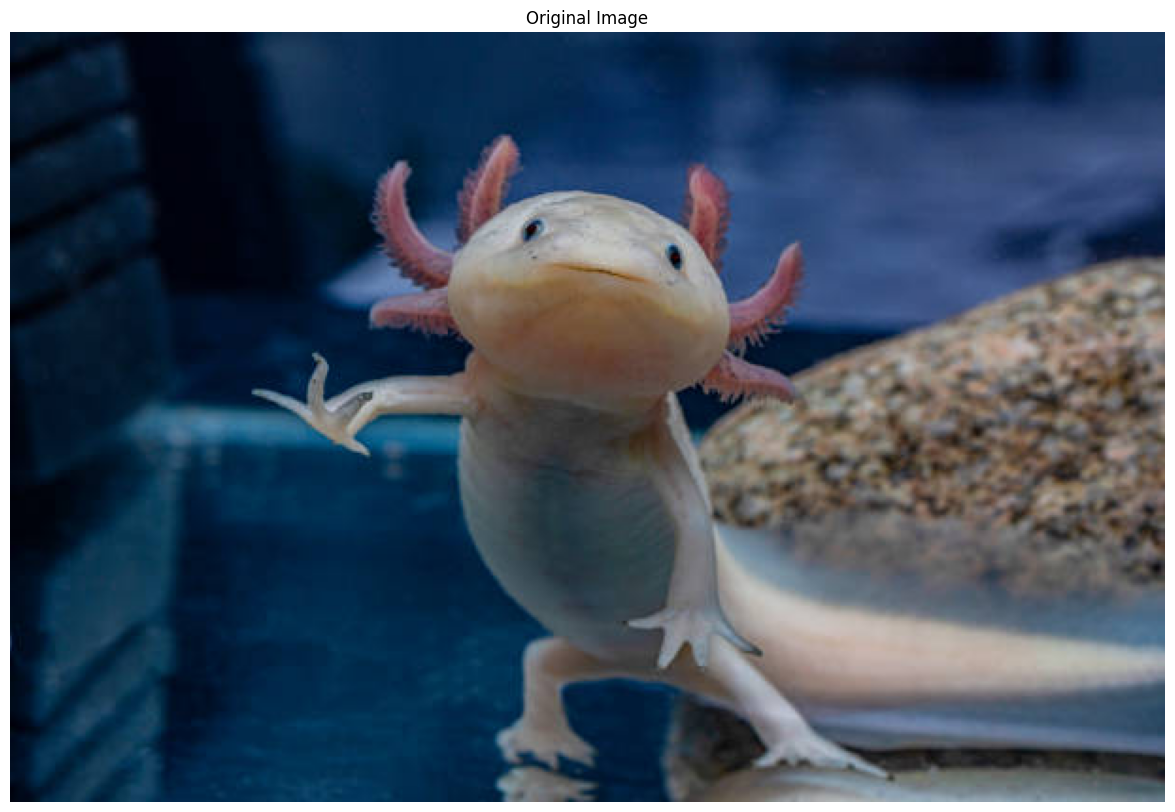

In [11]:
# Load the image
image_path = '../../input.jpg'
image = cv2.imread(image_path)

if image is None:
    print(f"Error: Could not load image from {image_path}")
else:
    print("Image loaded successfully.")
    display_images([image], ["Original Image"])

## 1. Smoothing Linear Spatial Filters (Low-pass)


### a) Box Filter (Averaging Filter)


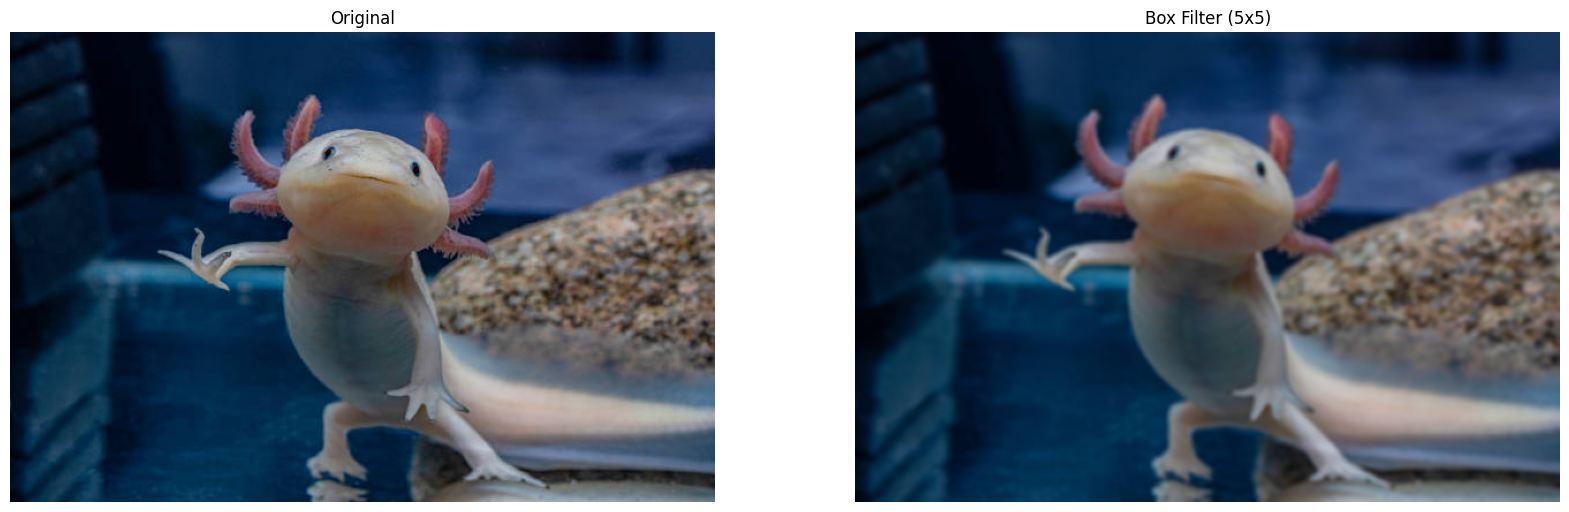

In [12]:
def box_filter(image, kernel_size):
    """Applies a box filter to an image."""
    return cv2.blur(image, (kernel_size, kernel_size))

# Apply Box filter
box_filtered_image = box_filter(image, 5)
display_images([image, box_filtered_image], ["Original", "Box Filter (5x5)"])

### b) Gaussian Filter

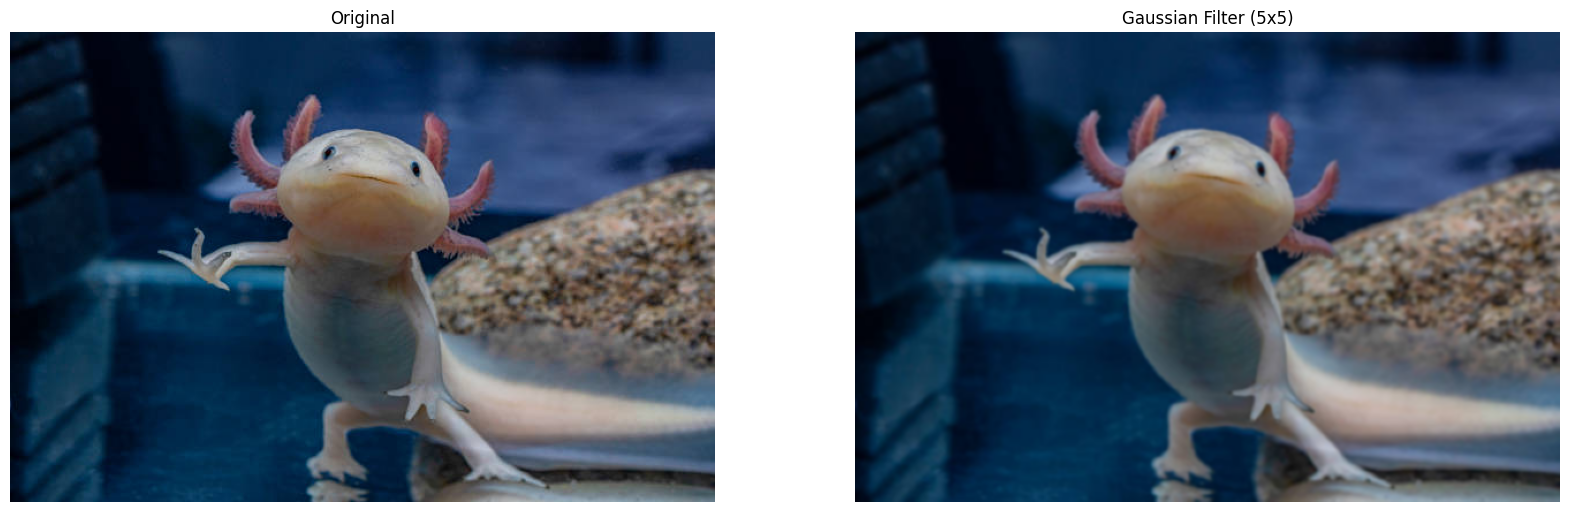

In [13]:
def gaussian_filter(image, kernel_size, sigma):
    """Applies a Gaussian filter to an image."""
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma)

# Apply Gaussian filter
gaussian_filtered_image = gaussian_filter(image, 5, 0)
display_images([image, gaussian_filtered_image], ["Original", "Gaussian Filter (5x5)"])

## 2. Sharpening Linear Spatial Filters (High-pass)


### a) Laplacian Filter


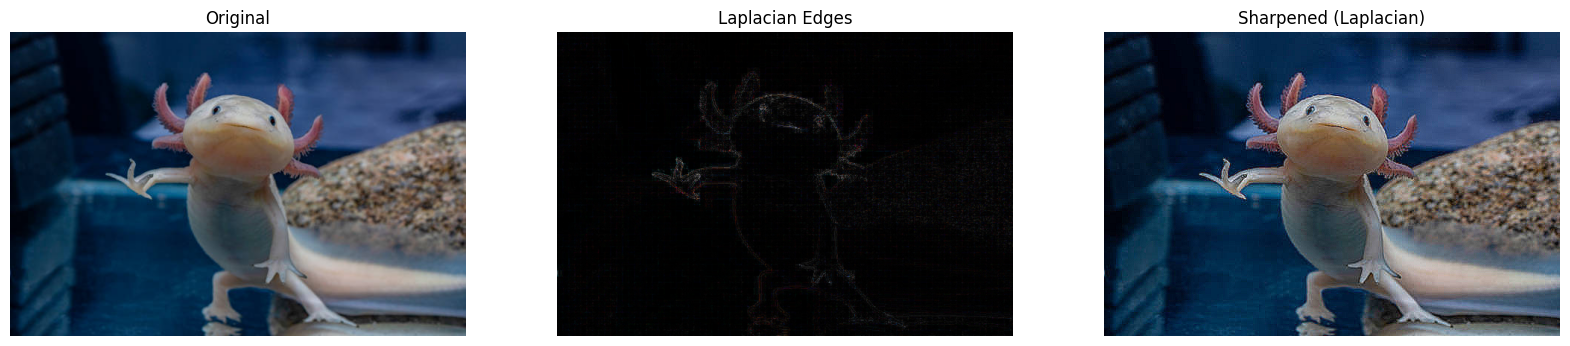

In [14]:
def laplacian_filter(image):
    """Applies a Laplacian filter to an image and sharpens it."""
    # Apply Laplacian filter
    laplacian = cv2.Laplacian(image, cv2.CV_64F)

    # Sharpen the image
    sharpened_image = cv2.convertScaleAbs(image - laplacian)

    return cv2.convertScaleAbs(laplacian), sharpened_image

# Apply Laplacian filter
laplacian_edge, sharpened_laplacian = laplacian_filter(image)
display_images([image, laplacian_edge, sharpened_laplacian], ["Original", "Laplacian Edges", "Sharpened (Laplacian)"])

### b) Unsharp Masking and High-boost Filtering

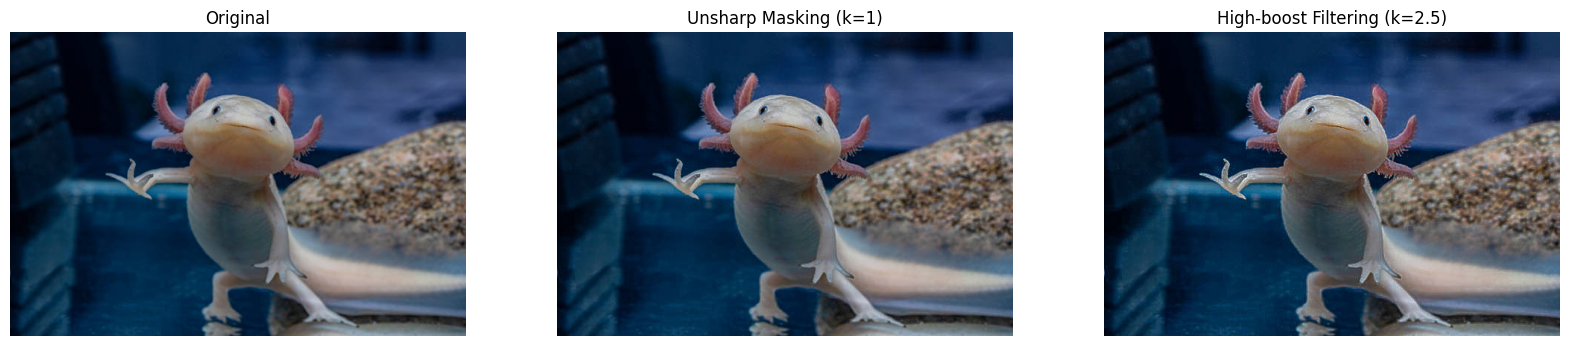

In [15]:
def unsharp_masking(image, kernel_size, k):
    """Applies unsharp masking or high-boost filtering."""
    # Blur the image
    blurred_image = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

    # Create the mask
    mask = cv2.subtract(image, blurred_image)

    # Add the mask to the original image
    sharpened_image = cv2.addWeighted(image, 1, mask, k, 0)

    return sharpened_image

# Apply Unsharp Masking (k=1)
unsharp_masked_image = unsharp_masking(image, 5, 1)

# Apply High-boost Filtering (k=2.5)
highboost_filtered_image = unsharp_masking(image, 5, 2.5)

display_images([image, unsharp_masked_image, highboost_filtered_image],
               ["Original", "Unsharp Masking (k=1)", "High-boost Filtering (k=2.5)"])